# Titanic Survival Prediction
### Logistic Regression vs Decision Tree
- Source: https://www.kaggle.com/datasets/yasserh/titanic-dataset
- Modified / Edited by: Edy Blau
- Date: 19/01/2025

This dataset contains information about the survival of passengers who traveled on the Titanic, the ocean liner that sank in the Atlantic in April 1915. It contains the following attributes:

|Feature|Description|
|--- |--- |
|PassangerId|ID|
|Survived|Whether survived (`1=Yes`) or not (`0=No`)|
|Pclass|Ticket class (1st, 2nd and 3rd)|
|Name|Name of Passanger|
|Sex|Gender|
|Age|Age|
|SibSp|No. of siblings / spouse aboard the Titanic|
|Parch|No. of parents / children aboard the Titanic|
|Ticket|Ticket Number|
|Fare|Passenger Fare|
|Cabin|Cabin Number|
|Embarked|Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)|

#### Upload the .csv file

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Basic Info and Description of the DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

#### Exploratory Data Analysis (EDA)

In [6]:
# For this, let's use ggplot style
plt.style.use('ggplot')

Text(0.5, 1.0, 'Survival by Gender')

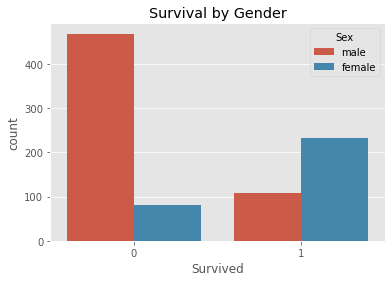

In [7]:
# Visualizing Survival rate by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')

It seems that women had a higher survival rate than men.

Text(0.5, 1.0, 'Survival by Passenger class')

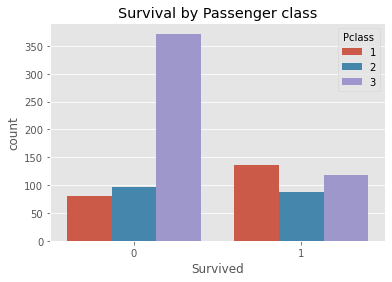

In [8]:
# Visualizing survival rate by Passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger class')

Although the survival rate is similar between classes, third class passengers unfortunately suffered the most casualties.

#### Data Pre-processing

In [9]:
# Checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


It seems that `Age` and `Cabin` columns have a lot of missing values.

To address this, Let's delete `Cabin` column (most of its rows are missing values).

In [10]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


And, for `Age` column, the Null values will be replaced with their median.

In [11]:
# Replacing all the Null values in Age with their median.
df['Age'].fillna(df['Age'].median(), inplace=True)

Let's delete the rows where `Embarked` columns has _null_ values.

In [12]:
df.dropna(subset=['Embarked'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now let's delete the unnecessary columns:
- `PassengerId`
- `Ticket`
- `Name`

In [13]:
df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [15]:
# Creating new features
# Family size
df['Family'] = df['SibSp'] + df['Parch']

In [16]:
# Binning age into categories
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [17]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Embarked', 'AgeGroup'], drop_first=True)
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,3,0,22.0,1,0,7.2500,1,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,1,1,35.0,1,0,53.1000,1,0,1,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,1,0


In [18]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

It seems the classes are unbalanced. This is important for future steps.

#### Train / Test Split

In [19]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (711, 12) (711,)
Test set: (178, 12) (178,)


#### Machine Learning Pipelines

In [20]:
# Machine Learning models instances: These will help to apply the GridSearchCV
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

In [21]:
# GridSearch Params: To search for the best hiperparameters
logreg_params = {
    'C': [0.1, 0.3, 1, 3],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 3, 5, 10],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}

In [22]:
# Applying GridSearchCv for every model
logreg_grid = GridSearchCV(logreg, param_grid=logreg_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='roc_auc', n_jobs=-1)

In [23]:
# Fitting the models
logreg_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc')

In [24]:
# Saving the best estimators (Which have the best hiperparameters)
best_logreg = logreg_grid.best_estimator_
best_rf = rf_grid.best_estimator_

In [25]:
# Logistic Regression Parameters
print("Logistic Regression parameters:")
print(best_logreg.get_params())

# Random Forest Parameters
print("Random Forest parameters:")
print(best_rf.get_params())


Logistic Regression parameters:
{'C': 0.3, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Random Forest parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [26]:
# Machine Learning Pipelines
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_logreg)
])

rf_pipeline = Pipeline([
    ('classifier', best_rf)
])

In [27]:
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5,
                                        n_estimators=200, random_state=42))])

#### Evaluation

In [28]:
# Logistic Regression Evaluation
# Predictions
y_pred_logreg = logreg_pipeline.predict(X_test)
# Classsification Report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
# Predicted Probabilities
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]
# ROC parameters: FPR (False Positive Rate), TPR (True Positive Rate)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
# AUC
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f'ROC-AUC Score: {roc_auc_logreg:.4f}')

# Random Forest Evaluation
# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
# Classsification Report
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
# Predicted Probabilities
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
# ROC parameters: FPR (False Positive Rate), TPR (True Positive Rate)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
# AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f'ROC-AUC Score: {roc_auc_rf:.4f}')

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.76      0.76        68

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.81      0.81       178

ROC-AUC Score: 0.8630

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.75      0.79      0.77        68

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178

ROC-AUC Score: 0.8568


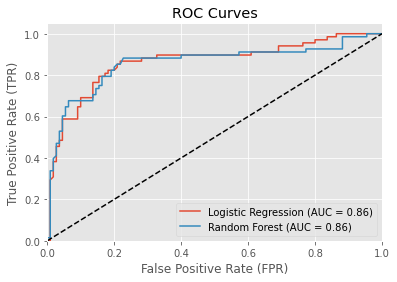

In [29]:
# Plotting the ROC-AUC curves
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves')
plt.legend(loc="lower right")

According to the results:
- Both models performed well and very similarly. Even in AUC, they are quite similar, however the Logistic Regression is slightly higher.
- Above all, both excel in the metrics for class 0 (Non-survivors) and perform adequately for class 1 (Survivors). This can be explained by class imbalance and for future approaches stratified cross-validation can be considered.